#**Boston Logan International (BOS) Flight Departure Delay Prediction**



photo-1610642372677-bcddb69f3531.avif

#**1. Executive Summary**




##1.1 Problem Definition and Motivation
Air travel is a popular mode of transportation for many people, with hundreds of thousands of flights operating globally each month in 2022. However, flight delays can disrupt travel plans. Before traveling by plane, travelers may not have enough information to make informed decisions about which flights are more likely to be delayed. This can lead to travelers choosing a flight that ends up being delayed and impacting their travel. It would be beneficial to use historical data to address this issue. Travelers are interested in identifying the optimal times, airlines, and destinations for traveling to minimize delays and enjoy seamless trips to new places and reunions with loved ones. We would like to provide a variety of tools for travelers to use to help them identify the most attractive flights to avoid departure delays.


##1.2 Project Objective
Our project objective is to create a series of visualizations to provide graphical information on departure delays for flights originating from Boston Logan International Airport. Our team analyzed the cause of flight delays by utilizing data provided by the US Department of Transportation Statistics. The data set contains flight information for a wide range of factors, such as schedule, airline, and season. The ultimate goal is to provide travelers with more accurate and informative insights on the expected departure delays they may encounter when flying during specific time periods, with particular airlines, and destinations. The visualizations will enable travelers to make more informed decisions about their travel plans to be better prepared for potential delays. 

Additionally, we plan on creating a Machine Learning model that will be able to accurately predict flight delays based on historic data using the above-mentioned variables. This tool will inform travelers of possible departure delays they might experience when traveling during a specific season, to a specific location, or traveling with a specific airline. 



##1.3 Dataset Information
Our team imported the data form [Bureau of Transportation Statistics](https://www.transtats.bts.gov/ONTIME/Departures.aspx) in order to gather information from each airline. This data included details on departure delays and destinations.  Moreover, our team download the data from [Humanitarian Data Exchange](https://data.humdata.org/dataset/ourairports-usa?fbclid=IwAR36ud-zTc1KwprOY9CdXpZFlisxxP_ql886mpHb2jk4DFqcs6gbcKqJEY8) in order to gather the information about longtitude and latitude of domestic airports, which can be utilized to create geographic visualizations.

##1.4 Report Summary
In this notebook, we began by processing, importing, and merging all of our datasets used into one dataframe. We then began our exploratory data analysis phase where we begin exploring the contents of our dataframe through visualizations. After creating a variety of useful and consumable visualizations we started working on a Machine Learning Model and User Interactive Widget. We wrap up our report by outlining some of our major challenges and conclusions drawn from our exploratory analysis, visualizations, and our model.

#**2 Data Processing**

In [1]:
#Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
import math
import calendar
import os
import warnings
warnings.filterwarnings('ignore')
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.preprocessing import StandardScaler

In [2]:
#Mount google drive
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [3]:
#Change directory to find files saved in shared google drive folder
%cd '/content/drive/Shareddrives/IS833_Team_7_Project/Airline_Datasets'


/content/drive/Shareddrives/IS833_Team_7_Project/Airline_Datasets


#2.1 Data Importing and Merging

In [4]:
# Loading all CSV files and skipping 7 rows to pass over titles provided by source download
df_fl = pd.read_csv('fl_data.csv', skiprows = 7, usecols= [i for i in range(17)])
df_as = pd.read_csv('as_data.csv', skiprows = 7, usecols= [i for i in range(17)])
df_g4 = pd.read_csv('g4_data.csv', skiprows = 7, usecols= [i for i in range(17)])
df_aa = pd.read_csv('aa_data.csv', skiprows = 7, usecols= [i for i in range(17)])
df_mq = pd.read_csv('mq_data.csv', skiprows = 7, usecols= [i for i in range(17)])
df_ev = pd.read_csv('ev_data.csv', skiprows = 7, usecols= [i for i in range(17)])
df_dl = pd.read_csv('dl_data.csv', skiprows = 7, usecols= [i for i in range(17)])
df_9e = pd.read_csv('9e_data.csv', skiprows = 7, usecols= [i for i in range(17)])
df_f9 = pd.read_csv('f9_data.csv', skiprows = 7, usecols= [i for i in range(17)])
df_ha = pd.read_csv('ha_data.csv', skiprows = 7, usecols= [i for i in range(17)])
df_b6 = pd.read_csv('b6_data.csv', skiprows = 7, usecols= [i for i in range(17)])
df_yv = pd.read_csv('yv_data.csv', skiprows = 7, usecols= [i for i in range(17)])
df_oh = pd.read_csv('oh_data.csv', skiprows = 7, usecols= [i for i in range(17)])
df_yx = pd.read_csv('yx_data.csv', skiprows = 7, usecols= [i for i in range(17)])
df_oo = pd.read_csv('oo_data.csv', skiprows = 7, usecols= [i for i in range(17)])
df_wn = pd.read_csv('wn_data.csv', skiprows = 7, usecols= [i for i in range(17)])
df_nk = pd.read_csv('nk_data.csv', skiprows = 7, usecols= [i for i in range(17)])
df_us = pd.read_csv('us_data.csv', skiprows = 7, usecols= [i for i in range(17)])
df_ua = pd.read_csv('ua_data.csv', skiprows = 7, usecols= [i for i in range(17)])
df_vx = pd.read_csv('vx_data.csv', skiprows = 7, usecols= [i for i in range(17)])


In [5]:
#Merge all dataframes togething
merged_df = pd.concat([df_fl, df_as, df_g4, df_aa, df_mq, df_ev, df_dl, df_9e, df_f9, df_ha, df_b6, df_yv, df_oh, df_yx, df_oo, df_wn, df_nk, df_us, df_ua, df_vx])
#Save the merged dataframe as a CSV file called merged.csv
merged_df.to_csv('firstdf.csv', index=False)

In [6]:
#Set merged_df to airlines_df 
airlines_df = pd.read_csv('firstdf.csv')

In [7]:
#Change directory to find files saved in shared google drive folder
%cd '/content/drive/Shareddrives/IS833_Team_7_Project/'

/content/drive/Shareddrives/IS833_Team_7_Project


In [8]:
#Import csv with carrier names to add carrier names - merge with airlines df
carrier_name_df = pd.read_csv('Carrier_names.csv')

#US airport lat long data set source: https://data.humdata.org/dataset/ourairports-usa
airports_df = pd.read_csv('us-airports.csv')

#Create df with only airport code, lat deg, long deg
lat_long_airports_df = airports_df[['iata_code', 'latitude_deg', 'longitude_deg']]


In [9]:
#Rename df column names to remove spaces and decapitalize
airlines_df = airlines_df.rename(columns = lambda x: x.replace(' ', '_').lower())
carrier_name_df = carrier_name_df.rename(columns = lambda x: x.replace(' ', '_').lower())
airports_df = airports_df.rename(columns = lambda x: x.replace(' ', '_').lower())
lat_long_airports_df = lat_long_airports_df.rename(columns = lambda x: x.replace(' ', '_').lower())

In [10]:
%cd '/content/drive/Shareddrives/IS833_Team_7_Project/Airline_Datasets'

/content/drive/Shareddrives/IS833_Team_7_Project/Airline_Datasets


In [11]:
#Merge all dataframes into one
airlines_carrier = pd.merge(airlines_df, carrier_name_df, left_on = 'carrier_code', right_on = 'iata_carrier_code')
merged_df = pd.merge(airlines_carrier, lat_long_airports_df, left_on='destination_airport', right_on='iata_code')
#Save the merged dataframe as a CSV file called merged.csv
merged_df.to_csv('merged.csv', index=False)

##2.2 Data Cleaning

In [12]:
#Data processing
merged_df['date'] = pd.to_datetime(merged_df['date_(mm/dd/yyyy)'], infer_datetime_format=True)
merged_df = merged_df.drop('date_(mm/dd/yyyy)', axis=1)
merged_df['year'] = pd.DatetimeIndex(merged_df['date']).year
merged_df['month'] = pd.DatetimeIndex(merged_df['date']).month
merged_df['day'] = pd.DatetimeIndex(merged_df['date']).day
# define function to apply
def check_delay(delay):
    if delay > 0:
        return 1
    else:
        return 0

# apply function to create new binary column
merged_df['delayed'] = merged_df['departure_delay_(minutes)'].apply(check_delay)

In [13]:
#Examine shape
merged_df.shape

(1156749, 27)

In [14]:
#Examine column info, nulls and datatype
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1156749 entries, 0 to 1156748
Data columns (total 27 columns):
 #   Column                                    Non-Null Count    Dtype         
---  ------                                    --------------    -----         
 0   carrier_code                              1156749 non-null  object        
 1   flight_number                             1156749 non-null  float64       
 2   tail_number                               1149734 non-null  object        
 3   destination_airport                       1156749 non-null  object        
 4   scheduled_departure_time                  1156749 non-null  object        
 5   actual_departure_time                     1156749 non-null  object        
 6   scheduled_elapsed_time_(minutes)          1156749 non-null  float64       
 7   actual_elapsed_time_(minutes)             1156749 non-null  float64       
 8   departure_delay_(minutes)                 1156749 non-null  float64       
 9   wh

In [15]:
merged_df.isna().sum()

carrier_code                                   0
flight_number                                  0
tail_number                                 7015
destination_airport                            0
scheduled_departure_time                       0
actual_departure_time                          0
scheduled_elapsed_time_(minutes)               0
actual_elapsed_time_(minutes)                  0
departure_delay_(minutes)                      0
wheels-off_time                                0
taxi-out_time_(minutes)                        0
delay_carrier_(minutes)                        0
delay_weather_(minutes)                        0
delay_national_aviation_system_(minutes)       0
delay_security_(minutes)                       0
delay_late_aircraft_arrival_(minutes)          0
iata_carrier_code                              0
icao_carrier_code                              0
carrier_name                                   0
iata_code                                      0
latitude_deg        

In [16]:
merged_df[merged_df.tail_number.isnull() == True].head(3)

,carrier_code,flight_number,tail_number,destination_airport,scheduled_departure_time,actual_departure_time,scheduled_elapsed_time_(minutes),actual_elapsed_time_(minutes),departure_delay_(minutes),wheels-off_time,...,icao_carrier_code,carrier_name,iata_code,latitude_deg,longitude_deg,date,year,month,day,delayed
6939,B6,427.0,NaN,BWI,08:45,00:00,92.0,0.0,0.0,00:00,...,JBU,JetBlue Airways,BWI,39.1754,-76.668297,2020-04-01,2020,4,1,0
6940,B6,1027.0,NaN,BWI,18:48,00:00,94.0,0.0,0.0,00:00,...,JBU,JetBlue Airways,BWI,39.1754,-76.668297,2020-04-01,2020,4,1,0
6980,B6,427.0,NaN,BWI,08:45,00:00,92.0,0.0,0.0,00:00,...,JBU,JetBlue Airways,BWI,39.1754,-76.668297,2020-04-02,2020,4,2,0


#2.2.1 Missing Tail Numbers Conclusion
Unfortunately, we were unable to identify why there were so many missing tail numbers in our dataset. We found no correlation between the missing tail numbers and any other variables within the dataset. Thus, we assume that missing tail numbers likely are due to the nature of the airline industry's flexibility surrounding the aircraft itself. We believe that it is possible that certain flights' tail numbers may be missing due to last-minute aircraft changes or having to deplane and re-plane a different aircraft causing the tail number to not be recorded. Under this assumption, we are going to drop all rows where the tail number is NaN which is a small percentage of the total population.

Now that the data has been cleaned, we wanted to explore the summary statistics to evaluate the average departure delay times and to begin our exploratory analysis. 



In [17]:
#Drop rows with missing tail numbers
merged_df = merged_df.dropna(subset=['tail_number'])

#Confirm no values are missing
merged_df.isna().sum()

carrier_code                                0
flight_number                               0
tail_number                                 0
destination_airport                         0
scheduled_departure_time                    0
actual_departure_time                       0
scheduled_elapsed_time_(minutes)            0
actual_elapsed_time_(minutes)               0
departure_delay_(minutes)                   0
wheels-off_time                             0
taxi-out_time_(minutes)                     0
delay_carrier_(minutes)                     0
delay_weather_(minutes)                     0
delay_national_aviation_system_(minutes)    0
delay_security_(minutes)                    0
delay_late_aircraft_arrival_(minutes)       0
iata_carrier_code                           0
icao_carrier_code                           0
carrier_name                                0
iata_code                                   0
latitude_deg                                0
longitude_deg                     

##2.4 Preliminary Data Exploration

In [18]:
merged_df.keys()

Index(['carrier_code', 'flight_number', 'tail_number', 'destination_airport',
       'scheduled_departure_time', 'actual_departure_time',
       'scheduled_elapsed_time_(minutes)', 'actual_elapsed_time_(minutes)',
       'departure_delay_(minutes)', 'wheels-off_time',
       'taxi-out_time_(minutes)', 'delay_carrier_(minutes)',
       'delay_weather_(minutes)', 'delay_national_aviation_system_(minutes)',
       'delay_security_(minutes)', 'delay_late_aircraft_arrival_(minutes)',
       'iata_carrier_code', 'icao_carrier_code', 'carrier_name', 'iata_code',
       'latitude_deg', 'longitude_deg', 'date', 'year', 'month', 'day',
       'delayed'],
      dtype='object')

In [19]:
merged_df.describe()

,flight_number,scheduled_elapsed_time_(minutes),actual_elapsed_time_(minutes),departure_delay_(minutes),taxi-out_time_(minutes),delay_carrier_(minutes),delay_weather_(minutes),delay_national_aviation_system_(minutes),delay_security_(minutes),delay_late_aircraft_arrival_(minutes),year,month,day,delayed
count,1.149734e+06,1.149734e+06,1.149734e+06,1.149734e+06,1.149734e+06,1.149734e+06,1.149734e+06,1.149734e+06,1.149734e+06,1.149734e+06,1.149734e+06,1.149734e+06,1.149734e+06,1.149734e+06
mean,1.401415e+03,1.817972e+02,1.722404e+02,9.574825e+00,1.882457e+01,3.868506e+00,4.677586e-01,3.497343e+00,1.710222e-02,4.316471e+00,2.016799e+03,6.539273e+00,1.574385e+01,3.394855e-01
std,1.060391e+03,9.785781e+01,9.933887e+01,4.121892e+01,9.527963e+00,2.381750e+01,9.263006e+00,1.638956e+01,8.460177e-01,2.230626e+01,3.020206e+00,3.380016e+00,8.763473e+00,4.735349e-01
min,1.000000e+00,3.900000e+01,0.000000e+00,-7.800000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.012000e+03,1.000000e+00,1.000000e+00,0.000000e+00
25%,6.010000e+02,9.900000e+01,9.300000e+01,-6.000000e+00,1.400000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.014000e+03,4.000000e+00,8.000000e+00,0.000000e+00
50%,1.213000e+03,1.650000e+02,1.530000e+02,-2.000000e+00,1.700000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.017000e+03,7.000000e+00,1.600000e+01,0.000000e+00
75%,2.043000e+03,2.150000e+02,2.120000e+02,6.000000e+00,2.200000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.019000e+03,9.000000e+00,2.300000e+01,1.000000e+00
max,9.665000e+03,7.050000e+02,7.640000e+02,1.545000e+03,1.750000e+02,1.545000e+03,1.470000e+03,1.237000e+03,2.050000e+02,1.509000e+03,2.022000e+03,1.200000e+01,3.100000e+01,1.000000e+00


In [20]:
#Set current directory to pathway where us-aiports.csv is
%cd '/content/drive/Shareddrives/IS833_Team_7_Project/'

/content/drive/Shareddrives/IS833_Team_7_Project


In [21]:
#Examing max, min, and average for departure delays
merged_df['departure_delay_(minutes)'].agg({'min', 'max', 'mean'}).round(2)

max     1545.00
mean       9.57
min      -78.00
Name: departure_delay_(minutes), dtype: float64

In [22]:
merged_df[merged_df['departure_delay_(minutes)'] <= -1].head(3)

,carrier_code,flight_number,tail_number,destination_airport,scheduled_departure_time,actual_departure_time,scheduled_elapsed_time_(minutes),actual_elapsed_time_(minutes),departure_delay_(minutes),wheels-off_time,...,icao_carrier_code,carrier_name,iata_code,latitude_deg,longitude_deg,date,year,month,day,delayed
0,FL,16.0,N290AT,BWI,16:36,16:31,92.0,92.0,-5.0,16:43,...,TRS,AirTran Airways,BWI,39.1754,-76.668297,2012-01-01,2012,1,1,0
2,FL,806.0,N991AT,BWI,6:00,5:57,92.0,81.0,-3.0,6:08,...,TRS,AirTran Airways,BWI,39.1754,-76.668297,2012-01-01,2012,1,1,0
3,FL,812.0,N950AT,BWI,8:30,8:23,94.0,94.0,-7.0,8:34,...,TRS,AirTran Airways,BWI,39.1754,-76.668297,2012-01-01,2012,1,1,0


In [23]:
#Adjusting for flights that leave early (removing them in this subset)
adj_merged_df = merged_df.copy()

#For loop drops negative values to see adjusted min, mean, and max values
for x in ['departure_delay_(minutes)']:
  adj_merged_df = adj_merged_df[adj_merged_df[x] >= 0]  
adj_merged_df.reset_index() 


adj_merged_df['departure_delay_(minutes)'].agg({'min', 'max', 'mean'}).round(2)

max     1545.00
mean      31.71
min        0.00
Name: departure_delay_(minutes), dtype: float64

In [24]:
#Check type of values in latitude_deg series
type(adj_merged_df['latitude_deg'].iloc[1])

str

In [25]:
#Convert latitude_deg and longitude_deg columns to float
adj_merged_df['latitude_deg'] = pd.to_numeric(adj_merged_df['latitude_deg'])
adj_merged_df['longitude_deg'] = pd.to_numeric(adj_merged_df['longitude_deg'])


In [26]:
#Verify value type
type(adj_merged_df['latitude_deg'].iloc[1])

numpy.float64

In [27]:
#Install folium library for heatmap visualization
!pip install folium -q

In [28]:
#Examine shape of new adjusted df
adj_merged_df.shape

(464228, 27)

## 2.4 Data Ingestion, Cleaning, Exploration Conclusions
We imported all of our relevant data and stored it under the name merged_df. This dataframe includes data from various sources. Outside of our original dataset, we imported a dataset listing each domestic airport's latitude and longitude coordinates. In addition to this, we imported a dataset that contained the flight carrier name as well as the carrier code associated with each individual airline. From this, we merged all datasets together to simplify and work with a singular dataframe.



#**3 Data Visualization and Analysis**

#3.1 The Concentration of Delays by Geographic Location
The geographic heatmap displays the density of flight delays across the United States. The HeatMap function from the Folium library is utilized to generate a heatmap mask on a geographic map that shows the concentration of departure delays. The delay values are normalized using sklearn’s MinMaxScaler to ensure that they fall within a range of 0 to 1, which ensures a fair comparison of delays across different airports. 



In [29]:
#Import maxminscaler
from sklearn.preprocessing import MinMaxScaler

#Create MinMaxScaler var
scaler = MinMaxScaler(feature_range=(0,1))

#Scale delay values to range of 0 to 1
adj_merged_df['scaled_delay'] = scaler.fit_transform(adj_merged_df[['departure_delay_(minutes)']])


#manually adding weights similar to the folium documentation would take too long - used MinMaxScaler to normalize departure delays


In [30]:
#Check for NaN values in the latitude_deg, longitude_deg, and scaled_delay columns
print(adj_merged_df[['latitude_deg', 'longitude_deg', 'scaled_delay']].isna().sum())

latitude_deg     0
longitude_deg    0
scaled_delay     0
dtype: int64


In [31]:
import folium
from folium.plugins import HeatMap

map_obj = folium.Map(location = [42.3601, -71.057083], zoom_start = 4.8)

lats_longs = adj_merged_df[['latitude_deg', 'longitude_deg']].drop_duplicates()
HeatMap(lats_longs).add_to(map_obj)

map_obj


In [32]:
#Ssave the map as an HTML file
map_obj.save('geo_heatmap.html')


##3.1.1 Heatmap Conclusions

At first glance, one might interpret the red areas as simply airports that have the most amount of flights, but thanks to the MinMaxScaler class in the sklear.preprocessing module, this is in fact a normalized comparison that clearly shows which destination airports around the country, when flying from BOS, have higher concentrations of departure delayed flights.

Surprisingly, an extremely busy airport such as ORD in Illinois does not have significant delays, however, most other Tier-1 cities with busy airports typically show to be red - at the higher end of average delays. Users can easily determine which airports or states should be avoided if they want to avoid departure delays, which is especially useful for connecting flights and time-sensitive travel.



#3.2 Airports with Highest Number of Flights
This table provides information about the highest number of flights.
This code determines the number of flights and average delay time for each destination airport in the merged dataset. It calculates the total number of flights and sorts them in descending order, then computes the sum of departure delays, and the average delay time, and creates a new dataframe with the top 10 airports by flight volume. The resulting dataframe is printed to the console.

Once we were able to visualize on a geographic map, concentrations of departure delays, we wanted to further investigate the actual airports with highest departure delay times and count of flights. 



In [33]:
#Visualize airports with highest number of flights (12ish) and use bar chart that shows percentage of flights that are on time or total amount of delayed flights
total_flights_airports = adj_merged_df.groupby('destination_airport')['departure_delay_(minutes)'].count()
total_flights_airports = total_flights_airports.sort_values(ascending=False)
delay_flights_airports = adj_merged_df[adj_merged_df['departure_delay_(minutes)'] > 0].groupby('destination_airport')['departure_delay_(minutes)'].sum()
delay_average_airports = delay_flights_airports / total_flights_airports

barplot_airports = total_flights_airports[:10]
barplot_airports = pd.merge(delay_average_airports,barplot_airports,on='destination_airport').sort_values(by = 'departure_delay_(minutes)_x', ascending=False)
print(barplot_airports)

                     departure_delay_(minutes)_x  departure_delay_(minutes)_y
destination_airport                                                          
LGA                                    41.641853                        17719
EWR                                    40.748625                        20364
JFK                                    40.555515                        19211
PHL                                    37.788273                        16611
DCA                                    34.826970                        22736
ORD                                    34.043257                        25892
SFO                                    30.083913                        20140
LAX                                    28.301788                        18122
BWI                                    27.882073                        21225
ATL                                    25.985552                        25124


#3.3 Percentage of Delay Flight by Airline
The bar chart provides a clear legible representation of the percentage of delayed flights for each airline, ranked in descending order. This information can support users in making informed decisions and planning their travel with a particular airline based on their performance in terms of flight delays.



In [34]:
adj_merged_df.head(3)

,carrier_code,flight_number,tail_number,destination_airport,scheduled_departure_time,actual_departure_time,scheduled_elapsed_time_(minutes),actual_elapsed_time_(minutes),departure_delay_(minutes),wheels-off_time,...,carrier_name,iata_code,latitude_deg,longitude_deg,date,year,month,day,delayed,scaled_delay
1,FL,804.0,N292AT,BWI,19:15,19:15,95.0,101.0,0.0,19:28,...,AirTran Airways,BWI,39.1754,-76.668297,2012-01-01,2012,1,1,0,0.000000
6,FL,172.0,N924AT,BWI,15:05,15:50,90.0,88.0,45.0,16:03,...,AirTran Airways,BWI,39.1754,-76.668297,2013-01-01,2013,1,1,1,0.029126
10,FL,16.0,N291AT,BWI,16:36,17:06,92.0,106.0,30.0,17:21,...,AirTran Airways,BWI,39.1754,-76.668297,2012-01-02,2012,1,2,1,0.019417


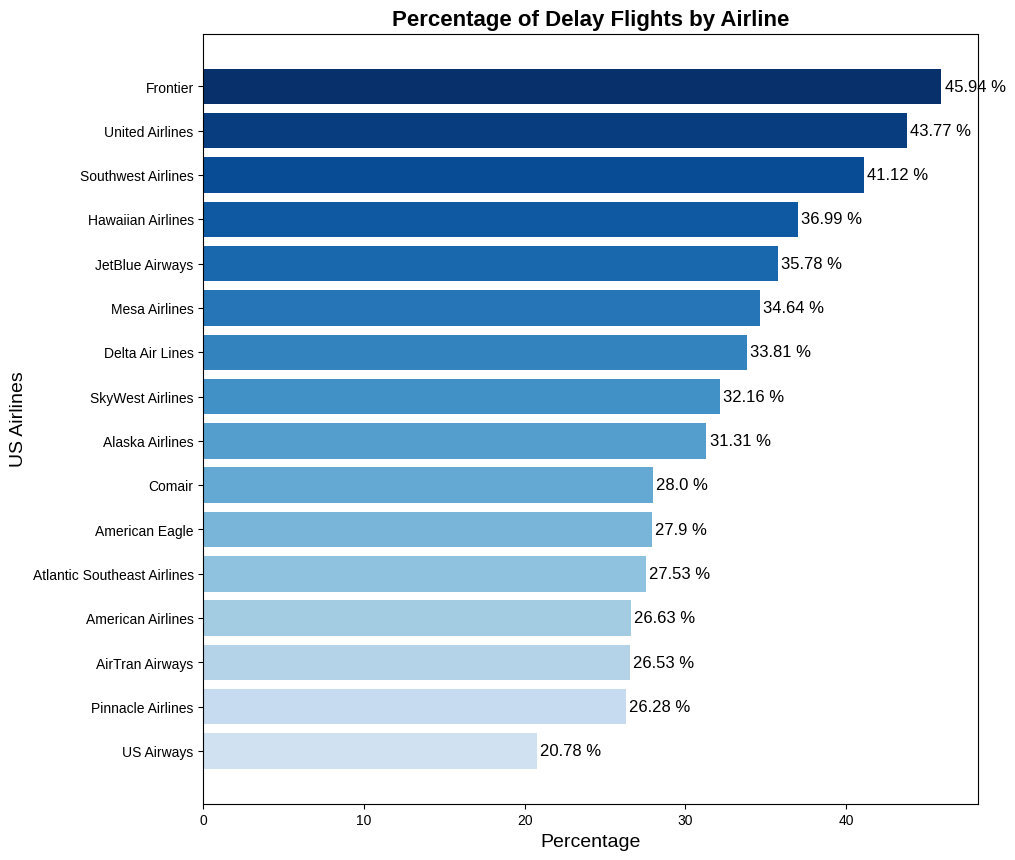

In [35]:
#Graph showing delays based on airline(carrier code)
import matplotlib.pyplot as plt

total_flights = merged_df.groupby('carrier_name')['departure_delay_(minutes)'].count()
delay_flights = merged_df[merged_df['departure_delay_(minutes)'] > 0].groupby('carrier_name')['departure_delay_(minutes)'].count()

delay_percentage = delay_flights / total_flights * 100
delay_percentage = delay_percentage.sort_values(ascending=True)

#Create the bar chart
fig, ax = plt.subplots(figsize=(10, 10))

#Initialize color and reverse ascending order
cmap = cm.get_cmap('Blues_r')
cmap = cmap.reversed()

# Create the horizontal bar chart with the progressive color scale
ax.barh(delay_percentage.dropna().index, delay_percentage.dropna().values, color=cmap(np.linspace(0.2, 1, len(delay_percentage))))
# Set the chart title and axis labels
ax.set_title('Percentage of Delay Flights by Airline', fontsize=16, fontweight='bold')
ax.set_xlabel('Percentage', fontsize=14)
ax.set_ylabel('US Airlines', fontsize=14)

for i, v in enumerate(delay_percentage.values): 
    ax.text(v + 0.2 , i , str(round(v, 2)) + " %", va='center', fontsize=12)

#Set style and display chart
plt.style.use('seaborn-v0_8-dark')
plt.show()


##3.3.1 Bar Chart Conclusions
The graph gives a clear indication of the historical trend per airline in its flights departing from BOS. We can clearly see that US Airways and American Airlines are among the airlines that have fewer departure-delayed flights, encouraging customers to choose them when flying rather than airlines towards the top of the graph which have higher rates of departure delays. Passengers can expect, that on Frontier, almost 1 in 2 flights will experience a departure delay when departing from BOS.



#3.4 Average Departure Delay by Month
This visualization provides graphical information on average departure delay in minutes by month, ranked in descending order. This visualization can provide insights into the patterns of departure delays throughout the year. The difference in delay period in each month may be caused by seasonal factors such as weather conditions and holidays. As a result, this information can be a piece of useful information for travelers to better understand the average departure delay trends by month, allowing them to make informed decisions and plan their trips more effectively, and prepare for potential delays based on seasonal factors.





In [36]:
merged_df.head(3)

,carrier_code,flight_number,tail_number,destination_airport,scheduled_departure_time,actual_departure_time,scheduled_elapsed_time_(minutes),actual_elapsed_time_(minutes),departure_delay_(minutes),wheels-off_time,...,icao_carrier_code,carrier_name,iata_code,latitude_deg,longitude_deg,date,year,month,day,delayed
0,FL,16.0,N290AT,BWI,16:36,16:31,92.0,92.0,-5.0,16:43,...,TRS,AirTran Airways,BWI,39.1754,-76.668297,2012-01-01,2012,1,1,0
1,FL,804.0,N292AT,BWI,19:15,19:15,95.0,101.0,0.0,19:28,...,TRS,AirTran Airways,BWI,39.1754,-76.668297,2012-01-01,2012,1,1,0
2,FL,806.0,N991AT,BWI,6:00,5:57,92.0,81.0,-3.0,6:08,...,TRS,AirTran Airways,BWI,39.1754,-76.668297,2012-01-01,2012,1,1,0


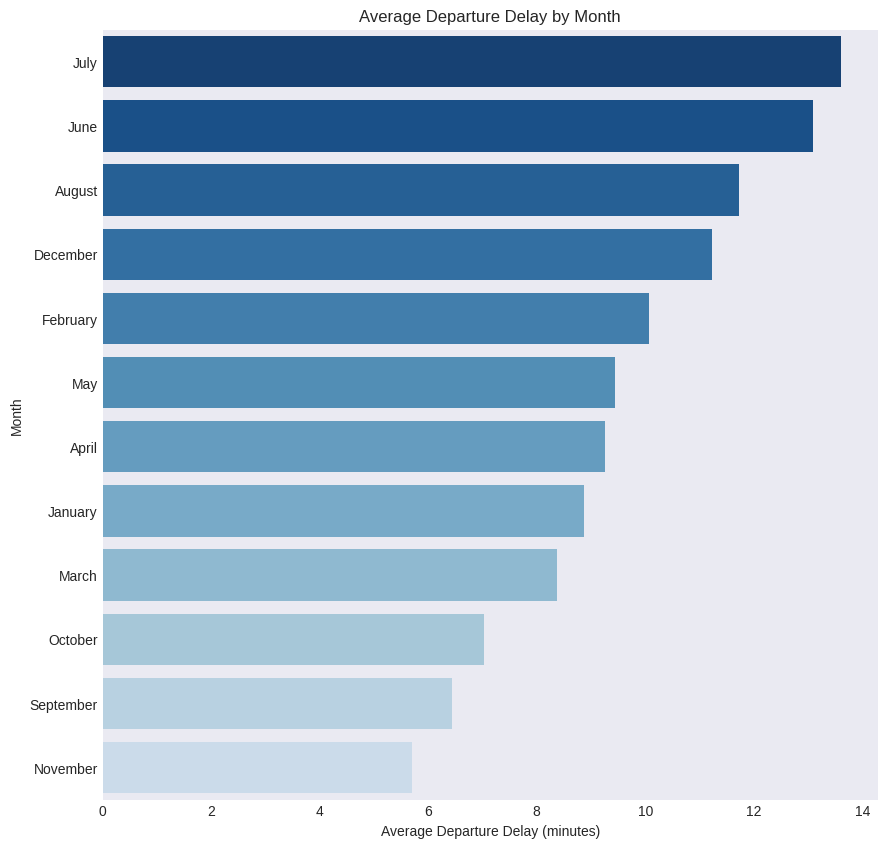

In [37]:
# Read in the data
df_monthly = merged_df

# Create a new column with the month names
df_monthly['month_name'] = pd.to_datetime(df_monthly['date']).dt.month_name()

# Define a blue color palette with a gradient
palette = sns.color_palette("Blues",n_colors=15)
palette.reverse()

#Plot the horizontal bar chart and invert the y-axis
fig, ax = plt.subplots(figsize=(10, 10))
sns.barplot(x='departure_delay_(minutes)', 
            y='month_name', 
            data=df_monthly, 
            order=df_monthly.groupby('month_name')['departure_delay_(minutes)'].mean().sort_values(ascending=False).index, 
            orient='h',
            palette=palette,
            ci=None)


#Set the x-tick labels and axis labels
ax.set_xlabel('Average Departure Delay (minutes)')
ax.set_ylabel('Month')

#Set the chart title and display chart
plt.title('Average Departure Delay by Month')
plt.show()

##3.4.1 Average Delay by Month Conclusion
From plotting the average delay in relation to the months we observe that July had the highest mean delay time and November having the least. This arises due to travel being at its peak during the summer periods when most people embark on holidays. In delaying with the huge travel volumes, issues pertaining to capacity and system scheduling errors usually have the tendency to cause delays for flights.  

In [38]:
# #Examining Range and Avg of airlines_df['Departure delay (Minutes)']
# airlines_df.head()

In [39]:
#Raw Max, Min, Mean (unadjusted)
print(merged_df.groupby('carrier_name')['departure_delay_(minutes)'].agg({'mean', 'min', 'max'}).sort_values(by = 'mean', ascending=False))

                                max       mean   min
carrier_name                                        
Frontier                     1221.0  18.063850 -20.0
SkyWest Airlines             1239.0  14.094457 -18.0
Hawaiian Airlines             859.0  12.322679 -20.0
United Airlines              1510.0  11.646308 -78.0
Comair                        142.0  11.560000  -8.0
JetBlue Airways              1068.0  11.004467 -66.0
Pinnacle Airlines            1089.0  10.621753 -25.0
Delta Air Lines              1185.0  10.445107 -30.0
Southwest Airlines            628.0  10.413017 -21.0
Atlantic Southeast Airlines  1545.0  10.306813 -25.0
Mesa Airlines                 400.0   9.876812 -15.0
American Eagle                907.0   9.038769 -22.0
American Airlines            1538.0   7.080310 -30.0
AirTran Airways               989.0   4.937019 -26.0
Alaska Airlines               764.0   4.545188 -29.0
US Airways                    475.0   1.656727 -21.0


In [40]:
#Raw Max, Min, Mean (unadjusted)
print(merged_df.groupby('destination_airport')['departure_delay_(minutes)'].agg({'mean', 'min', 'max'}).sort_values(by = 'mean', ascending=False))

                       max       mean   min
destination_airport                        
OAK                  302.0  24.553097 -15.0
SMF                  240.0  20.983986 -12.0
SYR                  425.0  19.213050 -34.0
BUR                  781.0  18.819302 -20.0
PSP                  185.0  16.555556 -13.0
...                    ...        ...   ...
MSN                   14.0  -0.800000  -9.0
TVC                   -2.0  -2.000000  -2.0
ILM                   79.0  -2.165414 -11.0
GRB                   -5.0  -5.000000  -5.0
GSP                   -7.0  -7.000000  -7.0

[82 rows x 3 columns]


In [41]:
#Inspecting adjusted min, max, mean (negative departure delays removed under adj_merged_df)
delay_by_airline = adj_merged_df.groupby('carrier_name')['departure_delay_(minutes)'].agg({'min', 'max', 'mean'}).sort_values(by = 'mean', ascending=True).reset_index()
delay_by_airline

,carrier_name,max,mean,min
0,Comair,142.0,22.666667,0.0
1,Southwest Airlines,628.0,24.147617,0.0
2,Alaska Airlines,764.0,25.046206,0.0
3,US Airways,475.0,25.485826,0.0
4,Mesa Airlines,400.0,27.601266,0.0
5,AirTran Airways,989.0,27.804202,0.0
6,United Airlines,1510.0,28.749597,0.0
7,Delta Air Lines,1185.0,30.885043,0.0
8,American Airlines,1538.0,33.089437,0.0
9,JetBlue Airways,1068.0,34.574134,0.0


In [42]:
#Create min, mean, max variables 
min = adj_merged_df['departure_delay_(minutes)'].min().round(2) 
mean = adj_merged_df['departure_delay_(minutes)'].mean().round(2) 
max = adj_merged_df['departure_delay_(minutes)'].max().round(2) 

In [43]:
#sanity check
print('min: ', min)
print('mean: ', mean)
print('max: ', max)

min:  0.0
mean:  31.71
max:  1545.0


#3.5 Average Delay by Airline

To better understand our dataset, we first calculated the raw or unadjusted max, min, and mean for departure delays for all airlines. After realizing that the dataframe also included negative departure times, meaning flights left early or were rescheduled for an early departure, we created an adjusted departure delay column in the dataframe to better understand departure delays by airline. The above visualization shows the average departure delay by airline compared to the population average. This helps us better understand which airlines have higher average delays relative to the mean. 



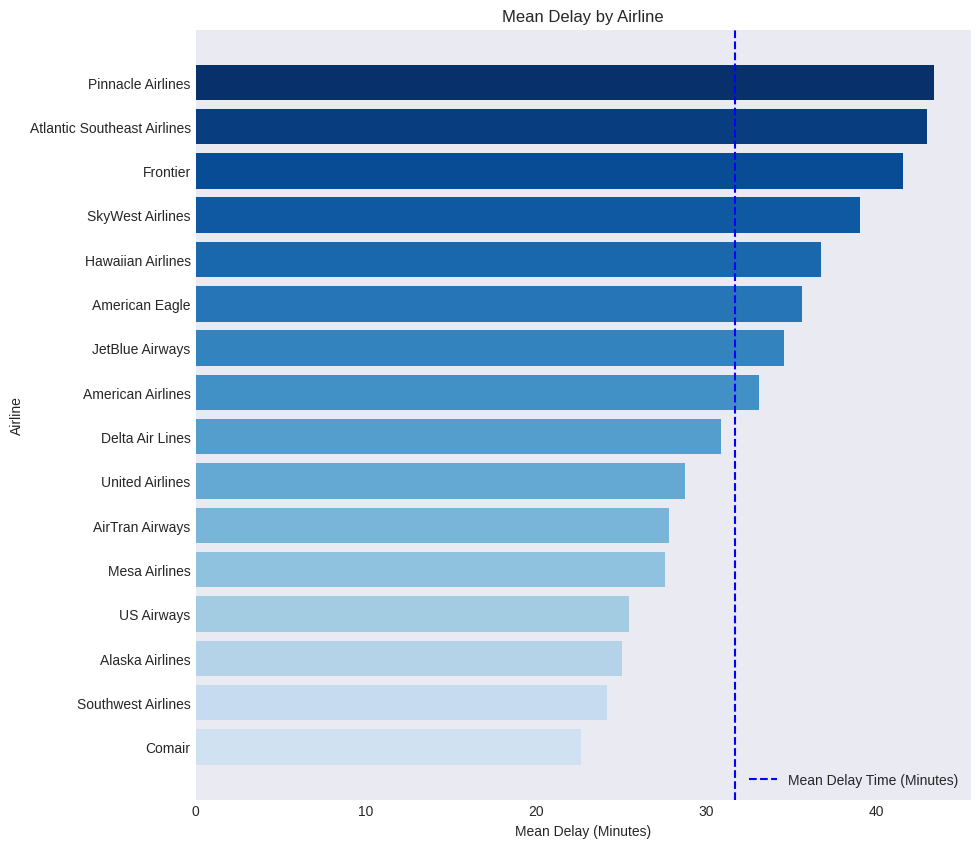

In [44]:
#Create fig, ax
fig, ax = plt.subplots(figsize= (10,10))

#Initialize color and reverse ascending order
cmap = cm.get_cmap('Blues_r')
cmap = cmap.reversed()

#Create x, y variables for barh plot
x = delay_by_airline['carrier_name']
y = delay_by_airline['mean']
#create barh plot
plt.barh(x, y, color=cmap(np.linspace(0.2, 1,len(delay_percentage))))

#create vertical line of mean delay time for population
plt.axvline(x = mean, color = 'b', linestyle='--', ymax = 100, label = 'Mean Delay Time (Minutes)')

# Set the x, y, labels and axis labels
ax.set_xlabel('Mean Delay (Minutes)')
ax.set_ylabel('Airline')
ax.set_title('Mean Delay by Airline')
ax.legend(loc='lower right')


plt.show()



#3.5.1 Average Delay by Airline
From the above graph we are able to determine that Pinnacle Airlines has the highest average delay and Comair having the least. The mean delay time falls within 32 minutes.

In [45]:
#Create new dataframe containing flights whose departure delay is greater than the mean delay
flights_above_mean = adj_merged_df[adj_merged_df['departure_delay_(minutes)'] >= mean]

In [46]:
#Create new dataframe containing flights whose departure delay is less than the mean delay
flights_below_mean = adj_merged_df[adj_merged_df['departure_delay_(minutes)'] < mean]

In [47]:
type(flights_below_mean)

pandas.core.frame.DataFrame

In [48]:
#Create a lenght variable for calculating percentages 
total_delayed_len = len(adj_merged_df['departure_delay_(minutes)'])

In [49]:
#Merge delayed <,> mean dataframes
total_delayed = pd.concat((flights_above_mean, flights_below_mean))


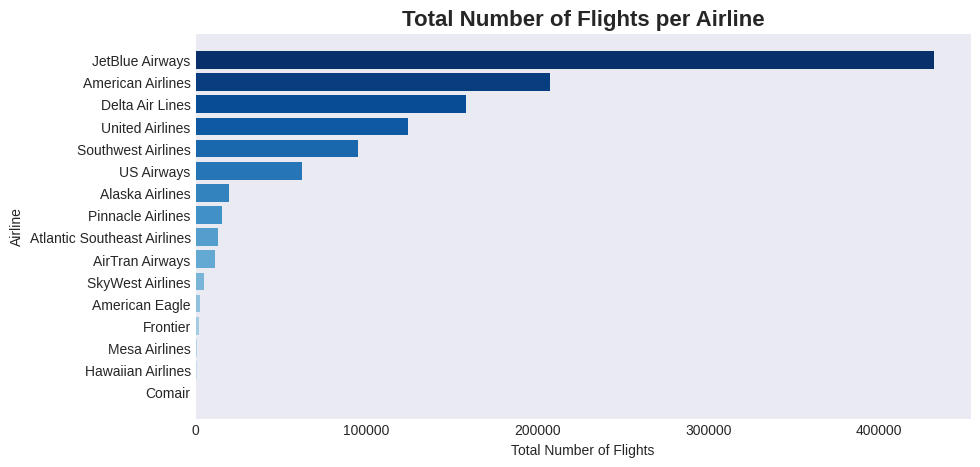

In [50]:
# get counts of flights per airline
counts = merged_df['carrier_name'].value_counts().sort_values()

# create figure and axis objects
fig, ax = plt.subplots(figsize=(10, 5))

# create horizontal bar chart with the same cmap color as the delay chart
cmap = cm.get_cmap('Blues_r')
cmap = cmap.reversed()

ax.barh(counts.index, counts.values, color=cmap(np.linspace(0.2, 1, len(counts))))

# set x-axis label
ax.set_xlabel('Total Number of Flights')

# set y-axis label
ax.set_ylabel('Airline')

# set title
ax.set_title('Total Number of Flights per Airline', fontsize=16, fontweight='bold')


plt.show()


# 3.6 Percentage of Delayed Flights Above and Below Mean

The pie chart offers a easy percentage visualization of flights that fall above and below the mean delay for the entire population.

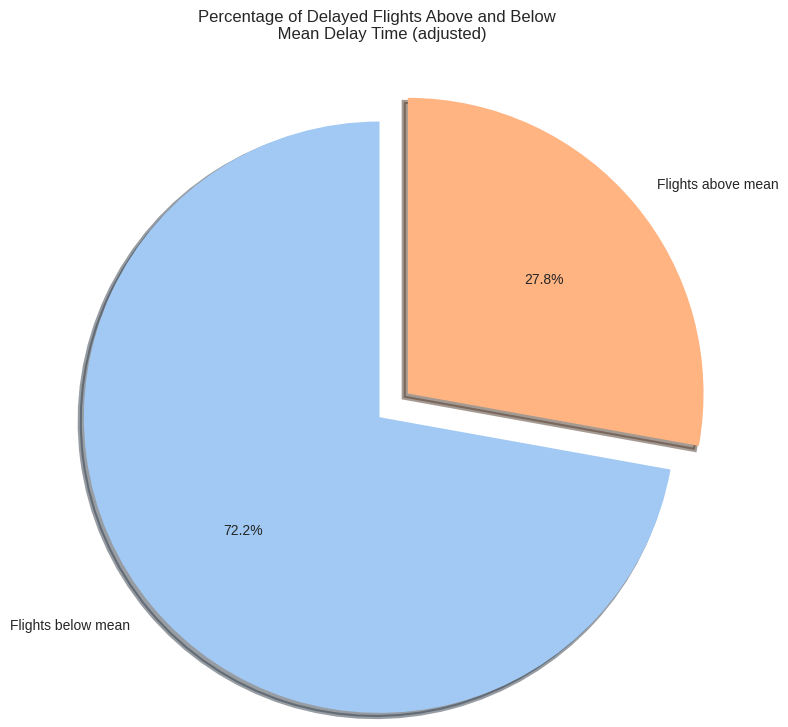

In [51]:
# Calculate percentages
percent_below_mean = (len(flights_below_mean)) / total_delayed_len * 100
percent_above_mean = (len(flights_above_mean)) / total_delayed_len * 100

#Create variables for pie chart
labels = ['Flights below mean', 'Flights above mean']
sizes = [percent_below_mean, percent_above_mean]
colors = sns.color_palette('pastel')


#Create pie chart
fig, ax = plt.subplots()
ax.pie(
    sizes, 
    explode =(0,.25),
    labels=labels,
    colors=colors,
    autopct='%1.1f%%',
    shadow = True,
    startangle = 90,
    radius = 2,
    wedgeprops = {'linewidth': 3}
    )

#Create and move title
ax.set_title(
    'Percentage of Delayed Flights Above and Below \n Mean Delay Time (adjusted)',
    fontdict = {'horizontalalignment': 'center'},
    y = 1.5
    )

plt.show()


#3.7 Histogram Plots Showing Departure Delayed Flights Across Minutes Delayed

The below histogram plots show how the population of flights delayed is distributed. The below histograms also show the distribution of delayed flights above and below the mean delay

(0.0, 250.0)

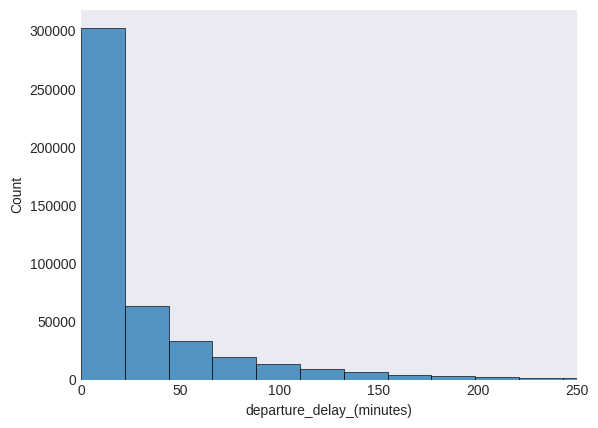

In [52]:
#Create a histogram plot that shows the distribution of all delayed flights by departure delay
sns.histplot(data = total_delayed, x = 'departure_delay_(minutes)', bins =70)
plt.xlim(0, 250)
# plt.ylim(0, 22000)

Text(0.5, 1.0, 'Flight Below Mean Delay Time')

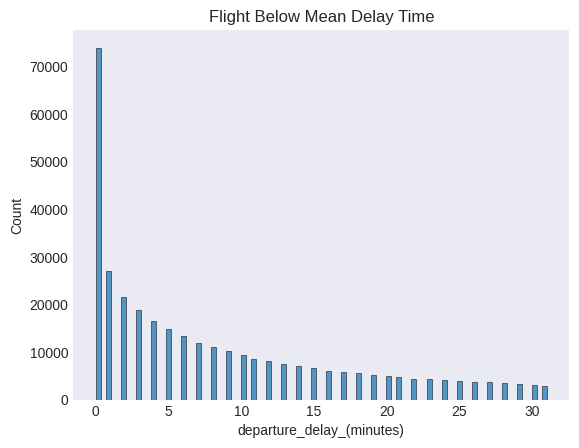

In [53]:
#Create a histogram plot that shows the distribution of all delayed flights below the departure delay mean of the population
sns.histplot(data = flights_below_mean, x = 'departure_delay_(minutes)')
plt.title('Flight Below Mean Delay Time')

Text(0.5, 1.0, 'Flights Above Mean Delay')

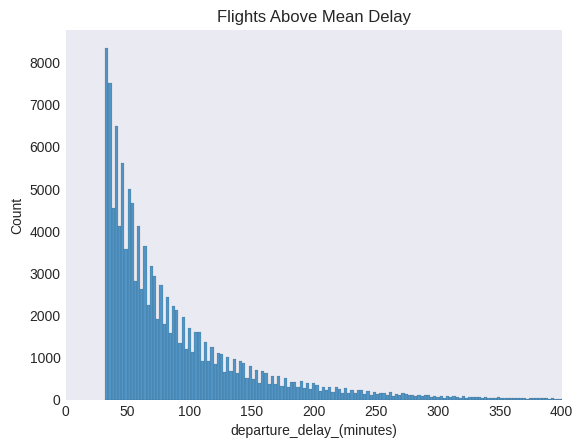

In [54]:
#Create a histogram plot that shows the distribution of all delayed flights above the departure delay mean of the population
sns.histplot(data = flights_above_mean, x = 'departure_delay_(minutes)')
plt.xlim(0, 400)
plt.title('Flights Above Mean Delay')

#3.8 Correlational Heatmap

The correlational heatmap provides an overview of the correlational coefficients between variables. A mask is used to reduce redundancy in the visualization and increase legibility. 

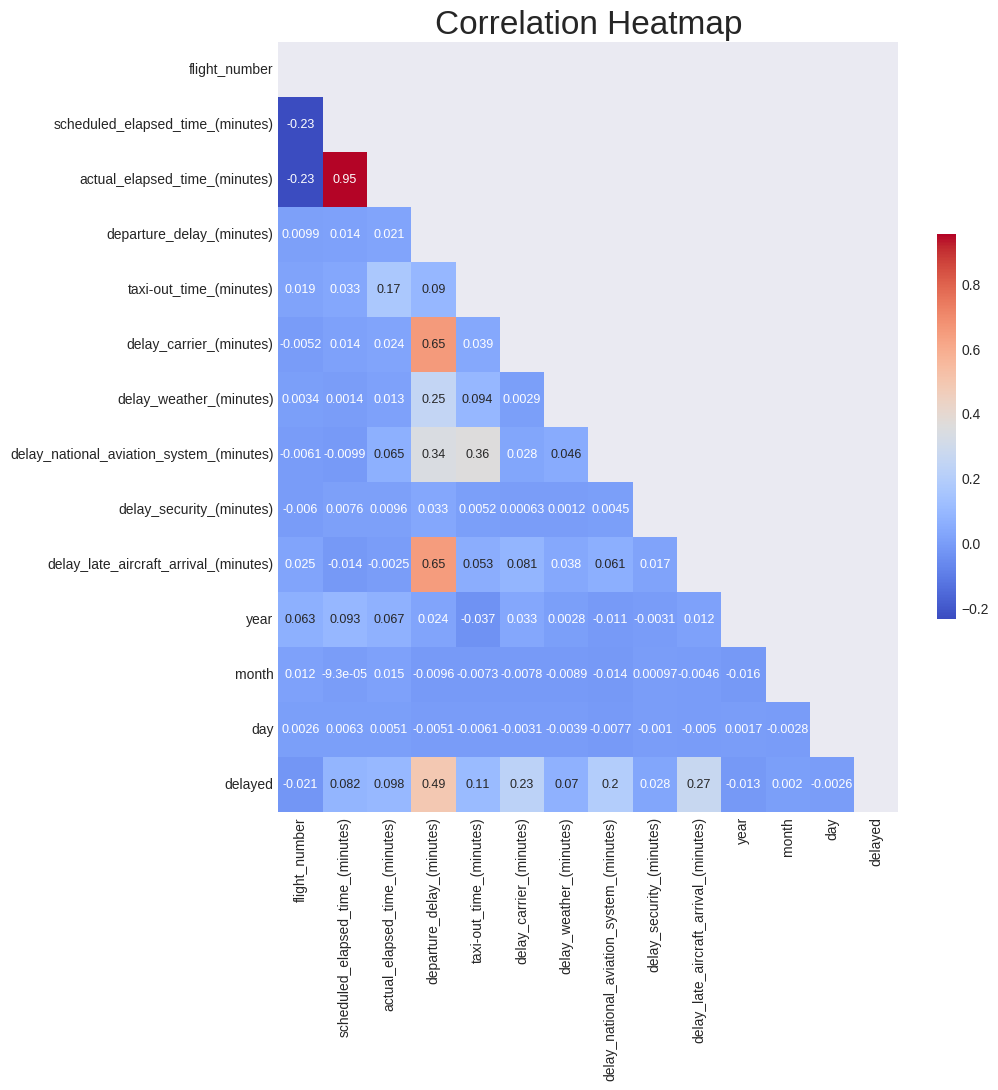

In [55]:
#Create corr variable
corr = merged_df.corr()

#Create figure and ax
fig, ax = plt.subplots(figsize = (10,10))

#Create mask to reduce redundancy of chart
mask = np.triu(np.ones_like(corr, dtype = bool))

# Plot heatmap
sns.heatmap(corr, annot =True, annot_kws={'size':9} , cmap="coolwarm", cbar_kws = {'shrink': .5}, ax = ax, mask = mask)
ax.set_title('Correlation Heatmap', fontdict = {'fontsize':24})
plt.show()

#3.9 Flight delays for each hour of the day

A bar chart that shows the number of flight departure delays for each hour of the day. The horizontal axis shows the hour of the day, from 0 to 23, and the vertical axis shows the number of delays. The height of each bar represents the number of flight delays that occurred during that hour.

You can use this graph to plan your travel better by avoiding flights during hours that are more likely to experience departure delays, or by selecting airlines that are less likely to have delays during your preferred travel times.



In [56]:
import plotly.express as px

# Load data from a CSV file
data = merged_df

# Convert scheduled departure time to a datetime object
data['scheduled_departure_time'] = pd.to_datetime(data['scheduled_departure_time'])

# Create a new column for the hour of the scheduled departure time
data['hour'] = data['scheduled_departure_time'].dt.hour

# Calculate the number of delayed flights for each hour of the day
delayed_by_hour = data.groupby('hour')['delayed'].sum().reset_index()

# Create a bar chart of the number of delays by hour
fig = px.bar(
    delayed_by_hour,
    x='hour',
    y='delayed',
    labels={'hour': 'Hour of the Day', 'delayed': 'Number of Delays'},
    title='3.9 Number of Delays by Hour of the Day'
)

# Display the bar chart
fig.show()


#3.9.1 Flight delays for each hour of the day conclusion

From the graph we are able to determine that most delays occur within 16:00 to 19:00. These might also be very busy periods within the airports with most flights happening within this timeframe hence the huge spike in delays.

#3.10 Flight delays for each airline and airport combination

The bubble chart shows the number of flight delays for each airline and airport combination. The x-axis shows the airline codes, the y-axis shows the airport codes, and the size of each bubble represents the number of flight delays for that combination. The color of each bubble represents the percentage of flights delayed for that combination.

In [57]:
# Group data by airline and airport, and calculate the number of delayed flights for each combination
delayed_by_airline_airport = data.groupby(['carrier_name', 'destination_airport'])['delayed'].agg(['count', 'sum']).reset_index()
delayed_by_airline_airport.rename(columns={'count': 'total_flights', 'sum': 'delayed_flights'}, inplace=True)
delayed_by_airline_airport['delayed_percentage'] = round(delayed_by_airline_airport['delayed_flights'] / delayed_by_airline_airport['total_flights'] * 100,2)

# Create bubble chart
fig = px.scatter(
    delayed_by_airline_airport,
    x='carrier_name',
    y='destination_airport',
    size='delayed_flights',
    color='delayed_percentage',
    labels={'carrier_name': 'Airline Name', 'destination_airport': 'Airport Code', 'delayed_flights': 'Number of Delays', 'delayed_percentage': '% Delayed'},
    title='Number of Delays by Airline and Airport'
)

# Display the bubble chart
fig.show()

##3.10.1 Flight delays for each airline and airport combination conclusion
The correlation between airlines, flight delays and airports is an important obersvation that can be obtained from the data. Using this we can show which in which airports airline operators experience their most delays. As a passenger it can be useful in determing which airline to use based on the airport you intend to travel.

After further exploring our merged dataset, we wanted to begin to build our Machine Learning Model. The aim of our model is to predict departure delay time based on the airline carrier name and destination airport to provide consumers with an interactive and useful tool.

#**4.0 Machine Learning Models**
To aid in our ability to make predictions that can give travelers insight on flight delays we will use machine learning models and train them on the dataset we have gathered. The performance on the model on a test dataset will enable us to determine its ability to predict flight delays. We will extensively cover model selection and deployment in the subsequent sections.

##4.1 Feature Engineering

In [58]:
#Create dummy variables for categorical variables
one_hot = pd.get_dummies(merged_df[['carrier_name', 'destination_airport']])

#4.1.1 Feature Engineering Conclusions
Through our data exploration and model design, we realized that we wanted to incorporate the flight carrier name and the flight destination airport in our predictive machine-learning model. Since these columns in our dataframe are populated with string objects, we needed to create dummy variables for these columns in order to incorporate them into our linear regression model. We used one hot encoding to create dummy variables for all strings within the respective carrier name and destination airport columns. 



##4.2 Linear Regression Model
In predicting flight delays with the data, we will use a linear regression model. An important step in this process is to split our data to a train and test set. The train data will be used to develop the model and the test data will be used to ascertain how well it can perform on an unseen data. Performance of the model is judged using two parameters which are Mean Squared Error(MSE) and R2.


In [59]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import joblib

# Combine dummy variables with other features
X = pd.concat([merged_df.drop(['departure_delay_(minutes)', 'carrier_name','iata_carrier_code' ,'destination_airport', 'carrier_code', 'tail_number', 'scheduled_departure_time', 'actual_departure_time', 'wheels-off_time', 'iata_code', 'carrier_name', 'icao_carrier_code','date', 'month_name'], axis=1), one_hot], axis=1)
y = merged_df['departure_delay_(minutes)']

# Split into training and testing sets
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.3, random_state=833)

# Initialize and fit linear regression model
model = LinearRegression()
model.fit(Xtrain, ytrain)

# Predict on testing set
y_pred = model.predict(Xtest)

# Performance metrics
mse = mean_squared_error(ytest, y_pred)
r2 = r2_score(ytest, y_pred)

# Print performance metrics
print('Mean Squared Error: ', mse)
print('R2 Score: ', r2)

# Save the trained model to a file
joblib.dump(model, 'trained_model.pkl')

RMSE = math.sqrt(mse)

Mean Squared Error:  90.02838271010461
R2 Score:  0.9468890881241473


##4.2.1 Linear Regression Model Conclusions
We chose to select Mean Squared Error(MSE) and R2 Score for evaluating our model performance. With an MSE of about 90, we believe that our model performs quite well indicating that the average difference between the predicted departure delay and the actual departure delay is about 9.5 minutes. The R2 Score of .946 indicates that the model explains almost 95% of the variability in departure delays. The score suggests that the model performs well as it can explain a high percentage of variability. Ultimately, the model performs well in predicting departure delays based on the available features within our dataset.





##4.3 Interactive Flight Delay Prediction Widget




In [60]:
import ipywidgets as widgets
# Load the trained model
model = joblib.load('trained_model.pkl') 


input_data = merged_df

# Preprocess the input data
one_hot = pd.get_dummies(input_data[['carrier_name', 'destination_airport']])
merged_df = pd.concat([input_data.drop(['departure_delay_(minutes)', 'carrier_name','iata_carrier_code' ,'destination_airport', 'carrier_code', 'tail_number', 'scheduled_departure_time', 'actual_departure_time', 'wheels-off_time', 'iata_code', 'icao_carrier_code','date', 'month_name'], axis=1), one_hot], axis=1)

# Create dropdown widgets for carrier name and destination airport
carrier_options = sorted(input_data['carrier_name'].unique())
destination_options = sorted(input_data['destination_airport'].unique())
carrier_dropdown = widgets.Dropdown(options=carrier_options, description='Carrier name:')
destination_dropdown = widgets.Dropdown(options=destination_options, description='Destination airport:')

# Define function to handle widget inputs and make predictions
def predict_delay(carrier_name, destination_airport):
    # Check if there is data matching the selected carrier name and destination airport
    if not ((merged_df['carrier_name_'+carrier_name] == 1) & (merged_df['destination_airport_'+destination_airport] == 1)).any():
        print('Please select other options as there is no data for this flight.')
        return
    
    # Preprocess the input data
    one_hot = pd.get_dummies(input_data[['carrier_name', 'destination_airport']])
    X = pd.concat([input_data.drop(['departure_delay_(minutes)', 'carrier_name','iata_carrier_code' ,'destination_airport', 'carrier_code', 'tail_number', 'scheduled_departure_time', 'actual_departure_time', 'wheels-off_time', 'iata_code', 'icao_carrier_code','date', 'month_name'], axis=1), one_hot], axis=1)
    
    # Make predictions for the given carrier name and destination airport
    predictions = model.predict(X.loc[(merged_df['carrier_name_'+carrier_name] == 1) & (merged_df['destination_airport_'+destination_airport] == 1)])
    
    # Print the predicted departure delay in minutes
    print('Predicted departure delay:', round(predictions[0],2), '+/-', round(RMSE, 2), 'minutes') 

# Connect widget inputs to prediction function
widgets.interactive(predict_delay, carrier_name=carrier_dropdown, destination_airport=destination_dropdown)


interactive(children=(Dropdown(description='Carrier name:', options=('AirTran Airways', 'Alaska Airlines', 'Am…

##4.3.1 Widget Conclusions
Since the root mean squared error is 9.49, we can say that the predicted departure delay of a unique carrier name and destination pair is within the predicted delay in minutes plus or minus the root mean squared error. It is worth noting that the root mean squared error only accounts for 1 standard deviation from the mean, meaning that the predicted value will be within plus or minus 9.49 minutes 68% if the distribution of errors is normal. To determine the distribution of errors we will plot a histogram to further investigate.



#**5.0 Examining the Errors from the Model**


#5.1 Histogram Showing Distribution of Errors

Text(0.5, 1.0, 'Distribution of Errors')

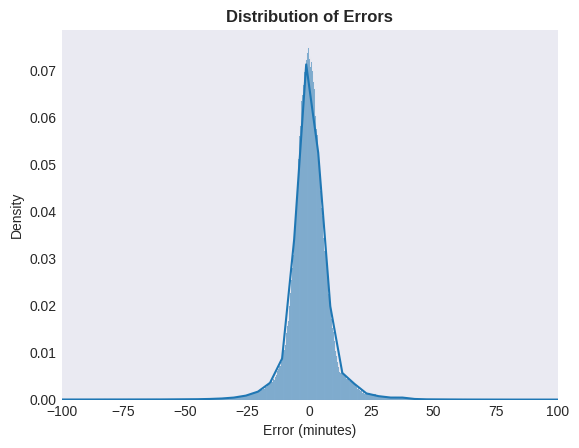

In [61]:
#Histogram showing the distributrion of erros
# Compute errors
errors = y_pred - ytest

# Plot distribution of errors
sns.histplot(errors, kde=True, stat='density')
plt.xlim(-100, 100)
# Add labels and title
plt.xlabel('Error (minutes)')
plt.ylabel('Density')
plt.title('Distribution of Errors', fontdict={'fontweight': 'bold'})



#5.1.1 Distribution of Errors Conclusions
The distribution of errors histogram shows very long tails. It appears to be normally distributed but to further examine the distribution of errors we will use a QQ plot to further examine the tails of the distribution of errors.



#5.2 Q-Q Plot of Errors

Text(0.5, 1.0, 'Q-Q Plot of Errors')

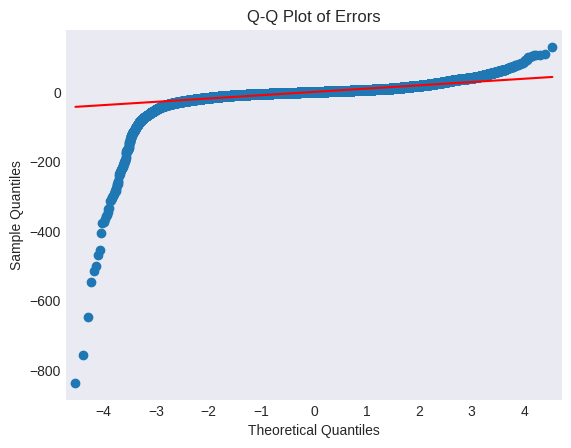

In [62]:
from statsmodels.graphics.gofplots import qqplot

# Create Q-Q plot
qqplot(errors, line='s')

# Customize x-axis tick marks

plt.xticks(np.array([-4, -3, -2, -1, 0, 1, 2, 3, 4]))
# Add labels and title
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')
plt.title('Q-Q Plot of Errors')


## 5.2.1 Q-Q Plot Of Errors Conclusion
The above Q-Q plot indicates that the errors seen in the linear regression model are mostly normally distributed. We see that there is a negative left tail that starts to deviate from the reference line at around -3 on the Theoretical Quantiles Axis. This indicates that the tailed deviations may be heavier than we would expect under a true normal distribution. Although the tails may be heavier, since the bulk of the data between -3 and 3 is close to the reference line, 99.7% of the data can be considered normally distributed, which in our case indicates that the model performs well enough under our predictive criteria. 




#**6.0** Data Exportation for Looker
To create further interactive plots, we export the dataset to Looker where we can use specified functions to highlight some interesting relations and observations from the data. This is also an ideal way to present and communicate data analysis to a wide audience for much easier understanding.



In [ ]:
from google.colab import files
merged_looker_export = merged_df.drop(columns=['scheduled_elapsed_time_(minutes)','actual_elapsed_time_(minutes)','taxi-out_time_(minutes)','year','month','day','delay_carrier_(minutes)','delay_weather_(minutes)','delay_national_aviation_system_(minutes)','delay_security_(minutes)','delay_late_aircraft_arrival_(minutes)'],axis=1)
merged_looker_export.to_csv('merged_looker_export.csv', index = False, encoding = 'utf-8-sig') 
files.download('merged_looker_export.csv')

#**7.0** Challenges
Throughout this project, we experienced a variety of challenges. One of the first challenges we faced was understanding and hypothesizing why Tail Numbers were missing from the dataset. Through our exploration and analysis, we were unable to find a convincing reason from the dataset itself. To appropriately deal with these NaN values for the Tail Numbers, we began to research the airline industry itself. We arrived at the conclusion that because of possible deplaning or last-minute aircraft changes, the tail numbers were lost or unrecorded. As a result, we dropped the rows with missing tail numbers under this assumption. 

Another challenge we faced was during the creation of our Machine Learning Model. Originally, we were attempting to use a logistic regression model but realized the model failed because we were omitting classification string variables and our y variable was continuous. After realizing this approach would not work, we shifted to a linear regression model. The difficulty with creating our linear regression model was incorporating the categorical string variables without running out of computational power. We ended up using one-hot encoding to create dummy variables for the carrier name and destination airport, as we wanted to ensure these variables were captured in the model.


The last major challenge we faced was implementing error handling in our drop-down widget. We originally created the widget that would only work if there was historical data for the unique pair of carrier names and destinations. If a unique pair was selected where there was no data, the widget would produce an error and crash. Ultimately, we leveraged ChatGPT to aid us in the creation of the error handling to ensure users would not get error messages resulting in the widget crashing.



#**8.0** Project Conclusions
In this project, our team utilized Python and a variety of imported libraries such as, Plotly, Seaborn, Folium, SciKit-Learn, ipywidgets, and more, to visualize and analyze flight delay data from major airlines in the US. Through our analysis, we were able to build a predictive model that accurately predicted the departure delay, in minutes, of a particular flight. Our visualizations revealed that flight departure delays were not concentrated in terms of day or month, but rather influenced by specific factors and variables in our dataset such as airport destination and the airline carrier. Moreover, our team also identified specific airports and routes that were more likely to experience departure delays. Our visualizations and model provide valuable insights that can help travelers gain enough information to make informed decisions about which flights are predicted to have a delay from the departure gate. Travelers can leverage our visualizations, machine learning predictive model, and widget, to better plan their travel journey.



References:

https://stackoverflow.com/questions/48899051/how-to-drop-a-specific-column-of-csv-file-while-reading-it-using-pandas

https://python-visualization.github.io/folium/quickstart.html#Getting-Started

https://docs.python.org/3/library/string.html#format-string-syntax


https://towardsdatascience.com/scale-standardize-or-normalize-with-scikit-learn-6ccc7d176a02

https://wellsr.com/python/plotting-geographical-heatmaps-with-python-folium-module/

https://www.statsmodels.org/stable/generated/statsmodels.graphics.gofplots.qqplot.html

https://ipywidgets.readthedocs.io/en/7.x/examples/Widget%20List.html

https://openai.com/blog/chatgpt - ChatGPT was used to help with errors and overall syntax issues. It was leveraged to help create the drop-down widget and provide resources on documentation for how to build and what types of interactive tools can be built with the ipywidgets library. 



